In [2]:
%load_ext autoreload
%autoreload 2
from matplotlib.pyplot import colorbar
from PSNS_2D import *
from PSNS_Callbacks import CallbackVars, Callbacks,computeKE,vortexPairCenter,vortexPairRadius,areaIntegral,vortexPairCenterVortCentroid
from numpy import pi, cos, sin,exp
import pickle
from numpy import savetxt
import pandas as pd
from scipy.special import jv
import pickle
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def window_fn(SV):
    X = SV.Mesh[0]
    Y = SV.Mesh[1]
    xl = SV.xR[0]
    xr = SV.xR[1]
    yl = SV.yR[0]
    yr = SV.yR[1]
    
    a = 1.05
    n = 27
    
    wx = 10**(-a**n*np.abs(2*(X-xl)/(xr-xl)-1)**n)
    wy = 10**(-a**n*np.abs(2*(Y-yl)/(yr-yl)-1)**n)
    w = wx*wy
    SV.U = SV.U*w
    
# def initial_condition(SV):
#     X   = SV.Mesh
#     xp  = X[0]
#     yp  = X[1]
#     sl  = SV.Lx
#     a_sq = 0.2**2
# #     Xc = np.array([sl*0.5])
# #     Yc = np.array([sl*0.5])
# #     Gam = np.array([1])
    
# #     Xc = np.array([sl*0.5,sl*0.5+sl,sl*0.5-sl,sl*0.5,sl*0.5])
# #     Yc = np.array([sl*0.5,sl*0.5,sl*0.5,sl*0.5+sl,sl*0.5-sl])
# #     Gam = np.array([1,1,1,1,1])
    
# #     Xc = np.array([3,9])
# #     Yc = np.array([sl*0.5,sl*0.5])
# #     Gam = np.array([1,1])
    
# #     Xc = np.array([sl*0.5+0.5,sl*0.5-0.5,\
# #                    sl*0.5+0.5,sl*0.5-0.5,\
# #                    sl*0.5+0.5,sl*0.5-0.5,\
# #                    sl*0.5+0.5+sl,sl*0.5-0.5+sl,\
# #                    sl*0.5+0.5-sl,sl*0.5-0.5-sl])
    
# #     Yc = np.array([sl*0.5,sl*0.5,\
# #                    sl*0.5+sl,sl*0.5+sl,\
# #                    sl*0.5-sl,sl*0.5-sl,\
# #                    sl*0.5,sl*0.5,\
# #                    sl*0.5,sl*0.5])
    
# #     Gam = np.array([1,-1,\
# #                     1,-1,\
# #                     1,-1,\
# #                     1,-1,\
# #                     1,-1])
        
#     def LO_vel(x_c,y_c,gam,xp,yp,a_sq):
#         x  =  np.copy(xp) - x_c
#         y  =  np.copy(yp) - y_c
        
#         r_sq = np.square(x) + np.square(y) + 1e-16
#         u = -gam*y*(1-exp(-r_sq/a_sq))/r_sq
#         v =  gam*x*(1-exp(-r_sq/a_sq))/r_sq
# #         u=0

#         return u,v
    
#     for xc,yc,gam in zip(Xc,Yc,Gam):
#         u,v    = LO_vel(xc,yc,gam,xp,yp,a_sq)
#         SV.U[0] += u
#         SV.U[1] += v
#         %matplotlib inline
#         print('was here')
# #         plt.plot(v[:,512])
# #         plt.show()
#         print(v[0,512],v[-1,512])
#         print(SV.U[1,0,512],SV.U[1,-1,512])
        
# #     SV.U[1]  += (1-exp(-1/a_sq))
    
def initial_condition(SV):
    X = SV.Mesh
    sL = SV.Lx
    xc1 = 0.5
    xc2 = -0.5
    a_sq = 0.067**2
    x1    = (X[0]-0.5*sL - xc1)
    x2    = (X[0]-0.5*sL - xc2)
    
    y1    =  X[1] - 0.5*sL
    y2    =  X[1] - 0.5*sL
    r_sq1 = np.square(x1) + np.square(y1) + 1e-16
    r_sq2 = np.square(x2) + np.square(y2) + 1e-16
        


#     SV.U[0]  = -(y1*(1-exp(-r_sq1/a_sq))/r_sq1)
#     SV.U[1]  =  (x1*(1-exp(-r_sq1/a_sq))/r_sq1) 
    SV.U[0]  = -(y1*(1-exp(-r_sq1/a_sq))/r_sq1 - y2*(1-exp(-r_sq2/a_sq))/r_sq2)
    SV.U[1]  =  (x1*(1-exp(-r_sq1/a_sq))/r_sq1 - x2*(1-exp(-r_sq2/a_sq))/r_sq2) 
#     window_fn(SV)
    SV.U[1]  += (1-exp(-1/a_sq))
    

def initial_conditionScullyVP(SV):
    X = SV.Mesh
    sL = SV.Lx
    xc1 =  0.5
    xc2 = -0.5
    a_sq = 0.07**2
    x1    = (X[0]-0.5*sL - xc1)
    x2    = (X[0]-0.5*sL - xc2)
    y1    =  X[1] - 0.5*sL
    y2    =  X[1] - 0.5*sL
    r_sq1 = np.square(x1) + np.square(y1) 
    r_sq2 = np.square(x2) + np.square(y2) 

    SV.U[0]  = -(y1/(a_sq + r_sq1) - y2/(a_sq + r_sq2))
    SV.U[1]  =  (x1/(a_sq + r_sq1) - x2/(a_sq + r_sq2)) + 1/(1+a_sq)

def initial_conditionRankineVP(SV):
    X  = SV.Mesh
    sL = SV.Lx
    xc1 =  0.5
    xc2 = -0.5
    R_sq = 2*0.067**2
    x1    = (X[0]-0.5*sL - xc1)
    x2    = (X[0]-0.5*sL - xc2)
    y1    =  X[1] - 0.5*sL
    y2    =  X[1] - 0.5*sL
    r_sq1 = np.square(x1) + np.square(y1) + 1e-7
    r_sq2 = np.square(x2) + np.square(y2) + 1e-7


    SV.U[0] = -((y1/R_sq)*(r_sq1<=R_sq) +  (y1/r_sq1)*(r_sq1>R_sq)) + ((y2/R_sq)*(r_sq2<=R_sq) +  (y2/r_sq2)*(r_sq2>R_sq))   
    SV.U[1] =  ((x1/R_sq)*(r_sq1<=R_sq) +  (x1/r_sq1)*(r_sq1>R_sq)) - ((x2/R_sq)*(r_sq2<=R_sq) +  (x2/r_sq2)*(r_sq2>R_sq))
#     window_fn(SV)
    SV.U[1] += 1

def initial_condition_2DTGV(SV):
    X = SV.Mesh
    sL = SV.Lx
    SV.U[0] = 1.0 + 2.0*sin(2*pi*X[0]/sL)*cos(2*pi*X[1]/sL)
    SV.U[1] = 1.0 - 2.0*cos(2*pi*X[0]/sL)*sin(2*pi*X[1]/sL)

def LC_initial_condition(SV):
    U = 1
    R = 1
    mu_1 = 3.83170597020751
    
    X = SV.Mesh
    sL= SV.Lx
    # print(sL)
    x = X[0] - 0.5*sL
    y = X[1] - 0.5*sL
    r = np.sqrt(np.square(x)+np.square(y)) + 1e-6
    cos_theta = x/r
    A = 2*U*R/(mu_1*jv(0,mu_1))
    B = mu_1*r/R
    S = -A*jv(1,B)*cos_theta*(r<=R) - (r>R)*U*r*(1-(R/r)**2)*cos_theta 
    
    Sf = rfft2(S)
    # SV.U[0]  =   irfft2(1j*SV.K[1]*Sf)
    # SV.U[1]  =  -irfft2(1j*SV.K[0]*Sf) 
    
    SV.U[0]  =  np.gradient(S,SV.dy,axis=1)
    SV.U[1]  = -np.gradient(S,SV.dx,axis=0)
    
    # print(S.shape)
    return irfft2(Sf*SV.K_sq)

def vortex_pair_data_extractor(SV,filename):

    # only going to save the data for right vortex 
    # Nt = -1
    # Ut = SV.Ut[:,:,:,Nt]
    # Uf = rfft2(Ut)
    Xc,Xc_ind = vortexPairCenter(SV.Uf,SV)  # SV.Uf has the value for last time step
    xc = Xc[0,1]
    yc = Xc[1,1]
    xc_ind = Xc_ind[0,1]
    yc_ind = Xc_ind[1,1]

    xc_middle_plane = 0.5*(Xc[0,0]+Xc[0,1])
    padx = 2
    pady = 2

    # size of box center around the middle plane of the pair
    box_w = 2  # in length units 
    box_h = 4   # in length units
    box_w_ind = int(box_w/SV.dx)
    box_h_ind = int(box_h/SV.dy)

    x_ind1 = int(xc_ind - int(0.5*np.abs(Xc[0,0]-Xc[0,1])/SV.dx) - padx)
    x_ind2 = int(x_ind1 + box_w_ind   + padx)
    y_ind1 = int(yc_ind - box_h_ind/2 - pady)
    y_ind2 = int(yc_ind + box_h_ind/2 + pady)

    U = irfft2(SV.Uf)
    # xc_ind,yc_ind =int(CBV.vortex_pair_cent_ind[0,0,-1]),int(CBV.vortex_pair_cent_ind[1,0,-1])
    # vel = SV.U[1,xc_ind,yc_ind]

    U_extract    = np.copy(U[:,x_ind1:x_ind2,y_ind1:y_ind2])
    # U_extract[1] = U_extract[1] - vel

    Mesh_extract = np.copy(SV.Mesh[:,x_ind1:x_ind2,y_ind1:y_ind2])
    Mesh_extract[0] = Mesh_extract[0] - xc_middle_plane
    Mesh_extract[1] = Mesh_extract[1] - yc

    dudx, dudy, dvdx, dvdy = velGradient(SV.Uf,SV)
    dudx_e, dudy_e, dvdx_e, dvdy_e = dudx[x_ind1:x_ind2,y_ind1:y_ind2].flatten(), \
                                     dudy[x_ind1:x_ind2,y_ind1:y_ind2].flatten(), \
                                     dvdx[x_ind1:x_ind2,y_ind1:y_ind2].flatten(), \
                                     dvdy[x_ind1:x_ind2,y_ind1:y_ind2].flatten()

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    s_x = np.linspace(0,1,10)
    s_y = np.zeros(s_x.shape)
    start_points = np.array((s_x,s_y)).T
    print(start_points.shape)
    plt.streamplot(Mesh_extract[0].T,Mesh_extract[1].T, U_extract[0].T, U_extract[1].T,\
     density=[20,20],color='k',start_points=start_points,minlength=0.1)
    plt.contourf(Mesh_extract[0],Mesh_extract[1],U_extract[0],levels = 30)
    plt.colorbar()
    plt.show()

    x = Mesh_extract[0].flatten()
    y = Mesh_extract[1].flatten()
    u = U_extract[0].flatten()
    v = U_extract[1].flatten()

    df = pd.DataFrame({"x" : x, "y" : y,"u" : u, "v" : v,"dudx":dudx_e,"dudy":dudy_e,"dvdx":dvdx_e,"dvdy":dvdy_e})
    df.to_csv(filename, index=False)

def base_flow_constraint(SV):
    U = irfft2(SV.Uf*SV.dealias)
    SV.Wf = vorticity2D_f(SV.Uf,SV)
    Wx    = irfft2(1j*SV.K[0]*SV.Wf*SV.dealias) 
    Wy    = irfft2(1j*SV.K[1]*SV.Wf*SV.dealias) 

    residual = U[0]*Wx + U[1]*Wy
    
    # residual = Wy
    return residual


In [97]:
Xc = [1,3]
Yc = [2,4]
g = [1]
for x,y,gam in zip(Xc,Yc,g):
    print(x,y,gam)

1 2 1


In [48]:
# SV.Uf = rfft2(SV.U)

t1 = time.time()
Re = 3142
SV = SolverVars(xR =[0,12],yR = [0,12],nx=512,ny=512,dt=0.001,T=0.8,anim_s=10,nu=2*pi/Re)
# SV = SolverVars(xR =[0,12],yR = [0,12],nx=512,ny=512,dt=0.001,T=0.8,anim_s=500,nu=2*pi/Re)
SV.a_targ=[0.5]
SV.padx = 90
SV.pady = 90
# SV.padx = 180
# SV.pady = 180

CBV = CallbackVars(SV)
generate_mesh(SV)
wavespace(SV)
# vort = LC_initial_condition(SV)
# initial_condition(SV)

initial_conditionRankineVP(SV)
# initial_conditionScullyVP(SV)
# initial_condition_2DTGV(SV)
solve_RK4(SV,CBV)
for i in range(2): SV.Uf[i] = rfft2(SV.U[i])
# print("Total simulation time == ",time.time()-t1)

# filename = "ouputs/Aug25/ext_data/velsp_rc_0.2_LO_st_nd_L12_1024_re_3000.csv"
# vortex_pair_data_extractor(SV,filename)
# res = base_flow_constraint(SV)
# for i in range(2): SV.Uf[i] = rfft2(SV.U[i])
# filename = r'E:/OneDrive/Research/code/PsuedoSpecNS/ouputs/Aug25/full_data/data_rc_0.2_LO_st_nd_L12_1024_re_3000.pkl'    
# save(SV,CBV,res,filename)

Iteration ==  10
Iteration ==  20
Iteration ==  30
Iteration ==  40
Iteration ==  50
Iteration ==  60
Iteration ==  70
Iteration ==  80
Iteration ==  90
Iteration ==  100
Iteration ==  110
Iteration ==  120
Iteration ==  130
Iteration ==  140
Iteration ==  150
Iteration ==  160
Iteration ==  170
Iteration ==  180
Iteration ==  190
Iteration ==  200
Iteration ==  210
Iteration ==  220
Iteration ==  230
Iteration ==  240
Iteration ==  250
Iteration ==  260
Iteration ==  270
Iteration ==  280
Iteration ==  290
Iteration ==  300
Iteration ==  310
Iteration ==  320
Iteration ==  330
Iteration ==  340
Iteration ==  350
Iteration ==  360
Iteration ==  370
Iteration ==  380
Iteration ==  390
Iteration ==  400
Iteration ==  410
Iteration ==  420
Iteration ==  430
Iteration ==  440
Iteration ==  450
Iteration ==  460
Iteration ==  470
Iteration ==  480
Iteration ==  490
Iteration ==  500
Iteration ==  510
Iteration ==  520
Iteration ==  530
Iteration ==  540
Iteration ==  550
Iteration ==  560
I

(10, 2)


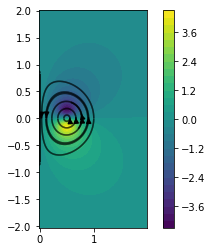

In [324]:
filename = "ouputs/Sep3/ext_data/velsp_rc_0.2_Ran_st_L12_1024_re_3142.csv"
vortex_pair_data_extractor(SV,filename)
res = base_flow_constraint(SV)
for i in range(2): SV.Uf[i] = rfft2(SV.U[i])
filename = r'E:/OneDrive/Research/code/PsuedoSpecNS/ouputs/Sep3/full_data/data_rc_0.2_Ran_st_L12_1024_re_3142.pkl'    
save(SV,CBV,res,filename)

In [19]:
Nt = -1
Ut = SV.Ut[:,:,:,Nt]
Ut = np.copy(SV.U)


Uf = rfft2(Ut)
W = np.zeros((SV.nx,SV.ny),dtype=dtype_re)
W = vorticity2D(Uf,SV)
S = streamfunction(Uf,SV)
W_d = vorticity2D_fd(Ut,SV)
# W_df = rfft2(W_d)*sig
# W_d = irfft2(W_df)


%matplotlib widget
# %matplotlib inline
# Xc,XCind = vortexPairCenter(Uf,SV)
Xc,XCind = vortexPairCenterVortCentroid(Uf,SV)


# SV.padx = 72
# SV.pady = 100
padx = SV.padx
pady = SV.pady
x1 = int(0.5*SV.nx-padx)
x2 = int(0.5*SV.nx)
# x1 = int(0.5*SV.nx)
# x2 = int(0.5*SV.nx+padx)
y1 = int(XCind[1,1]-pady*0.5)
y2 = int(XCind[1,1]+pady*0.5)

shiftx = 0
fig, ax = plt.subplots()
ax.set_aspect('equal')
# plt.contour(W.T,levels = 50,cmap='jet')
# plt.contourf(SV.Mesh[0],SV.Mesh[1],Ut[1].T*0.05,levels = 100,cmap='jet')
# plt.contourf(SV.Mesh[0],SV.Mesh[1],W*0.05,levels = 100,cmap='jet')
plt.contourf(SV.Mesh[0],SV.Mesh[1],W,levels = 50,cmap='jet')
# plt.contourf(S.T,levels = 50,cmap='jet')
# plt.contourf(vort.T,levels = 50,cmap='jet')


# plt.plot(Xc[0,0],Xc[1,0],'ro',markersize=2)
# plt.plot(Xc[0,1],Xc[1,1],'ro',markersize=2)

# plt.plot(XCind[0,0],XCind[1,0],'ro',markersize=2)
# plt.plot(XCind[0,1],XCind[1,1],'ro',markersize=2)
rec = mpl.patches.Rectangle([SV.Mesh[0,x1,y1],SV.Mesh[1,x1,y1]], SV.Mesh[0,x2,y2]-SV.Mesh[0,x1,y2], SV.Mesh[1,x2,y2]-SV.Mesh[1,x1,y1],linestyle= '--',angle=0.0,fc ='none',ec ='r',lw = 1)
rec2 = mpl.patches.Rectangle([SV.Mesh[0,x1+padx,y1],SV.Mesh[1,x1,y1]], SV.Mesh[0,x2,y2]-SV.Mesh[0,x1,y2], SV.Mesh[1,x2,y2]-SV.Mesh[1,x1,y1],linestyle='--', angle=0.0,fc ='none',ec ='b',lw = 1)
ax.add_patch(rec)
ax.add_patch(rec2)
plt.colorbar()
# plt.clim(-1.8,1.8)
plt.show()


W_test = W
Gamma = (W_test[x1:x2,y1:y2]).sum()*SV.dx*SV.dy
xc = np.sum( SV.Mesh[0,x1:x2,y1:y2]*W_test[x1:x2,y1:y2]*SV.dx*SV.dy)/Gamma
yc = np.sum( SV.Mesh[1,x1:x2,y1:y2]*W_test[x1:x2,y1:y2]*SV.dx*SV.dy)/Gamma
# xc = Xc[0,0]
# yc = Xc[1,0]
ax = np.sqrt(np.abs(np.sum((SV.Mesh[0,x1:x2,y1:y2]-xc)**2*W_test[x1:x2,y1:y2])*SV.dx*SV.dy/Gamma))
ay = np.sqrt(np.abs(np.sum((SV.Mesh[1,x1:x2,y1:y2]-yc)**2*W_test[x1:x2,y1:y2])*SV.dx*SV.dy/Gamma))


Gamma,xc,yc,ax,ay,(ax**2+ay**2)**0.5,Xc[:,0],CBV.vortex_pair_rad[:,0,-1]
# XCind


# XCind,Xc
# plt.savefig("ouputs/Aug25/plots/LO_init_vort_box.png", facecolor='none', bbox_inches="tight",
#             pad_inches=0.05, transparent=True, dpi=300)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-6.283172770321526,
 3.5000024897093462,
 4.000010218065952,
 0.047549089927796856,
 0.047856284291602706,
 0.06746213678175642,
 array([3.49999995, 4.0000004 ]),
 array([0.04756208, 0.04786843]))

In [36]:
CBV.eulerResidual[1,:]

array([1.00339157, 1.00259994])

In [62]:
# x = SV.Mesh[0].flatten()
# y = SV.Mesh[1].flatten()
# u = SV.U[0].flatten()
# v = SV.U[1].flatten()

# df = pd.DataFrame({"x" : x, "y" : y,"u" : u, "v" : v})
# filename='single_vortex_with_two_ghost_on_either_side.csv'
# df.to_csv(filename, index=False)

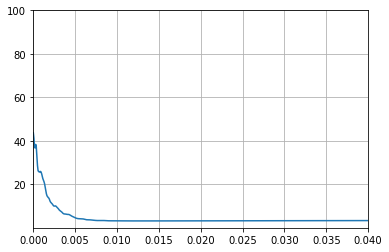

In [141]:
CBV_8 = CBV
SV_8 = SV
# CBV_12 = CBV
# SV_12  = SV

%matplotlib inline
XCind,Xc
t = np.arange(0,SV.T,SV.dt)*(1/0.067**2)/Re
N = 800
ax = CBV.vortex_pair_rad[0,1]
ay = CBV.vortex_pair_rad[1,1]
E = ay/ax

# plt.plot(t[:N],E[:N])
# plt.semilogy(t[:N],CBV_6_5.eulerResidual[1,:N])
# plt.semilogy(t[:N],CBV.eulerResidual[1,:N])
plt.plot(t[:N],CBV.eulerResidual[1,:N])
# plt.semilogy(t[:N],CBV_7.eulerResidual[1,:N])
# plt.plot(CBV_8.temp1[:])
# plt.plot(CBV_7.temp1[:])
# plt.plot(CBV_6_5.temp1[300:])
# plt.plot(CBV.temp1[300:])

plt.xlim([0,0.04])
plt.ylim([1e-3,1e2])
plt.grid()
plt.show()
# plt.plot(CBV.residual[1,:])
# CBV.eulerResidual.shape

In [49]:
# SV.Uf = rfft2(SV.U)
# file_out = open("ER.txt","a")

SV_i = SV

ER = np.zeros(81)
for i in range(81):
    Nt = i
    U  = SV_i.Ut[:,:,:,Nt]
    # U = np.copy(SV.U)
    Uf = rfft2(U)

    # Uf = 
    Xc,Xcind = vortexPairCenterVortCentroid(Uf,SV)

    Wf = vorticity2D_f(Uf,SV_i)
    W  = vorticity2D(Uf,SV_i)

    Wx_f  = 1j*Wf*SV_i.K[0]*SV_i.fou_filt
    Wy_f  = 1j*Wf*SV_i.K[1]*SV_i.fou_filt
    Wx    = irfft2(Wx_f)
    Wy    = irfft2(Wy_f)

    # for i in range(2): U[i,:,:] = irfft2(Uf[i])

    pady = SV_i.padx
    padx = SV_i.pady
    x1 = int(0.5*SV_i.nx-padx)
    x2 = int(0.5*SV_i.nx)
    y1 = int(Xcind[1,1]-pady*0.5)
    y2 = int(Xcind[1,1]+pady*0.5)

    # left vortex integrals
    Q = np.square(U[0]*Wx + U[1]*Wy)
    limits = np.array([[x1,x2],[y1,y2]])
    ER_numer = areaIntegral(Q,SV_i,limits)
    ER_denom = areaIntegral(np.square(W),SV_i,limits)
    ER[Nt] = (ER_numer/ER_denom)**0.5

# A = np.sum(np.square(SV_i.U[0,x1:x2,y1:y2]*Wx[x1:x2,y1:y2] + SV_i.U[1,x1:x2,y1:y2]*Wy[x1:x2,y1:y2]))*SV_i.dx*SV_i.dy
# B = np.sum(np.square(SV_i.W[x1:x2,y1:y2]))*SV_i.dx*SV_i.dy

(ER_numer/ER_denom)**0.5,CBV.eulerResidual[0,-1],ER_numer,ER_denom


(0.13034307238396386, 2.2681270448855257, 9.524649245575684, 560.6258047643656)

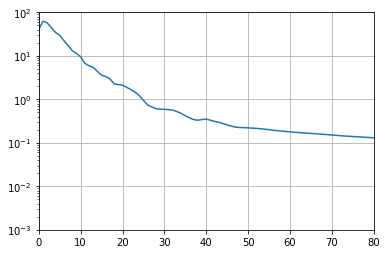

In [50]:
# t = np.arange(0,SV.T,SV.dt)*(1/0.067**2)/Re
plt.semilogy(ER)
plt.ylim([1e-3,1e2])
plt.xlim([0,80])
plt.grid()
plt.show()

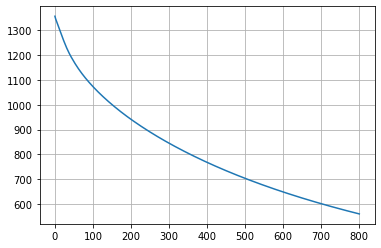

In [67]:
%matplotlib inline
XCind,Xc
t = np.arange(0,SV.T,SV.dt)*(1/0.067**2)/Re
N = 800
ax = CBV.vortex_pair_rad[0,1]
ay = CBV.vortex_pair_rad[1,1]
# E = ay/ax

# plt.plot(t[:N],E[:N])
# plt.semilogy(t[:N],CBV.eulerResidual[1,:N])
plt.plot(CBV.temp2[:])
# plt.plot(CBV.temp1[:])
# plt.xlim([0,0.04])
# plt.ylim([1e-3,1e2])
plt.grid()
plt.show()
# plt.plot(CBV.residual[1,:])
# CBV.eulerResidual.shape

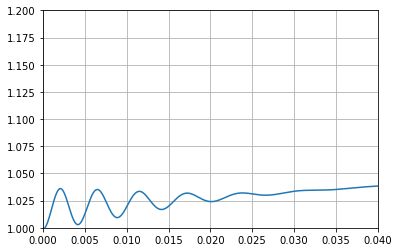

In [8]:
%matplotlib inline
XCind,Xc
t = np.arange(0,SV.T,SV.dt)*(1/0.067**2)/3142
N = 800
ax = CBV.vortex_pair_rad[0,1]
ay = CBV.vortex_pair_rad[1,1]
E = ay/ax
plt.plot(t[:N],E[:N])
# plt.semilogy(t[:N],CBV.eulerResidual[1,:N])
plt.xlim([0,0.04])
plt.ylim([1,1.2])
# plt.ylim([1e-3,1e2])
plt.grid()
plt.show()
# plt.plot(CBV.residual[1,:])
# CBV.eulerResidual.shape

In [41]:
%matplotlib widget

# plt.plot(Ut[1,:,256])
# plt.plot(Ut[0,512,:])
# plt.hlines(0,0,1024,'r')
plt.plot(W[:,200])
# plt.plot(W_d[:,512])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [224]:
%matplotlib widget

plt.plot(Ut[1,:,512])
plt.hlines(1,0,1024,'r')
# plt.plot(W[:,512])
# plt.plot(W_d[:,512])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
%matplotlib inline
plt.plot(CBV.max_val_residual[0,1:])
plt.show()
plt.plot(CBV.max_val_residual[1,1:])
plt.show()

In [ ]:
%matplotlib inline
a = np.sqrt(CBV.vortex_pair_rad[0,0,1:]**2 + CBV.vortex_pair_rad[1,0,1:]**2)
E = CBV.vortex_pair_rad[1,0,1:]/CBV.vortex_pair_rad[0,0,1:]
# plt.plot(np.sqrt(CBV.vortex_pair_rad[0,0,:]**2 + CBV.vortex_pair_rad[1,0,:]**2))
plt.plot(E)
plt.show()

CBV.vortex_pair_rad[0,0,SV.it],CBV.vortex_pair_rad[1,0,SV.it],a[-1]

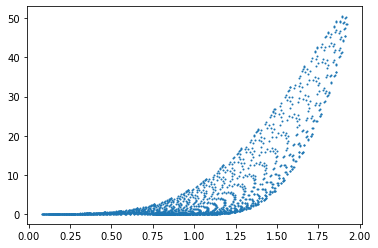

In [264]:
Uf = rfft2(SV.U)
W = vorticity2D(Uf,SV)
S = streamfunction(Uf,SV)

x = np.arange(514,554,dtype=int)
y = np.arange(488,538,dtype=int)
X,Y = np.meshgrid(x,y,indexing='ij')

W_val = W[X,Y]
S_val = S[X,Y]
plt.scatter(S_val,W_val,s=1)
plt.show()

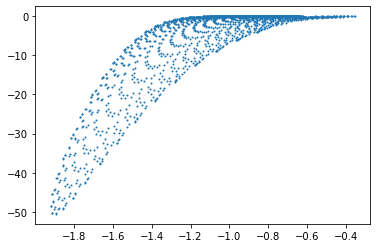

In [265]:
Uf = rfft2(SV.U)
W = vorticity2D(Uf,SV)
S = streamfunction(Uf,SV)

x = np.arange(454,504,dtype=int)
y = np.arange(488,538,dtype=int)
X,Y = np.meshgrid(x,y,indexing='ij')


W_val = W[X,Y]
S_val = S[X,Y]
plt.scatter(S_val,W_val,s=1)
plt.show()

## Lamb Oseen Rankine comparsion

In [24]:
# filepath = r"ouputs/Aug25/full_data/data_Re_3142_Ran_L12_1024.pkl"
# infile = open(filepath,'rb')
# SV_ran  = pickle.load(infile)
# CBV_ran  = pickle.load(infile)
# infile.close()

# filepath = r"ouputs/Aug25/full_data/data_Re_3142_LO_L12_1024.pkl"
filepath = r"ouputs/Aug25/full_data/data_rc_0.2_LO_st_nd_L12_1024_re_2400.pkl"
infile = open(filepath,'rb')
SV_LO  = pickle.load(infile)
CBV_LO  = pickle.load(infile)
infile.close()

In [4]:
# 4X4 plot
index = [0,1,4,9,16]
vort_ran = []
a_ran = []
a = np.sqrt(CBV_ran.vortex_pair_rad[0,0,1:]**2 + CBV_ran.vortex_pair_rad[1,0,1:]**2)
for i in index:
    U_ran = SV_ran.Ut[:,:,:,i]
    Uf = rfft2(U_ran)
    Xc,XCind = vortexPairCenterVortCentroid(Uf,SV_ran)
    W_ran = vorticity2D(Uf,SV_ran)
    vort_ran.append(W_ran[:,int(XCind[1,0])])
    if i!=16:
        a_ran.append(a[i*500])
    else:
        a_ran.append(a[i*500-1])


index = [0,1,4,9,16]
vort_LO = []
a_LO = []
a = np.sqrt(CBV_LO.vortex_pair_rad[0,0,1:]**2 + CBV_LO.vortex_pair_rad[1,0,1:]**2)
for i in index:
    U_LO = SV_LO.Ut[:,:,:,i]
    Uf = rfft2(U_LO)
    Xc,XCind = vortexPairCenterVortCentroid(Uf,SV_LO)
    W_LO = vorticity2D(Uf,SV_LO)
    vort_LO.append(W_LO[:,int(XCind[1,0])])
    if i!=16:
        a_LO.append(a[i*500])
    else:
        a_LO.append(a[i*500-1])

# data = {"vort_500":}
# savemat(filepath,)


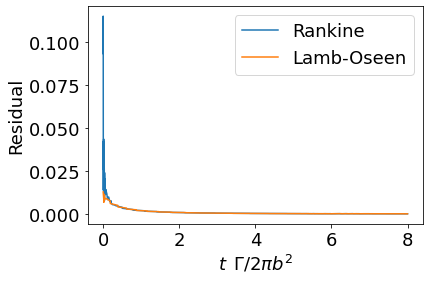

In [112]:
t = np.arange(0,SV_LO.T,SV_LO.dt)
plt.plot(t,CBV_ran.max_val_residual[1,1:])
plt.plot(t,CBV_LO.max_val_residual[1,1:])
plt.legend(['Rankine','Lamb-Oseen'])
plt.xlabel('$t \hspace{0.5}\Gamma/2\pi b^2$')
plt.ylabel('Residual')

plt.savefig("ouputs/Aug25/plots/LO_Ran_residue.png", facecolor='none', bbox_inches="tight",
            pad_inches=0.05, transparent=True, dpi=300)

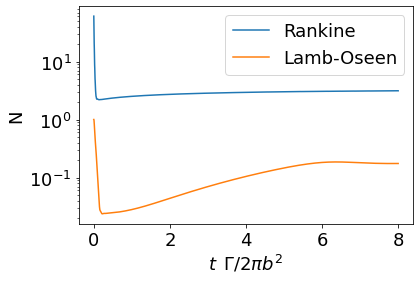

In [102]:
N = 8000
plt.semilogy(time[:N],CBV_ran.eulerResidual[1,:N])
plt.semilogy(time[:N],CBV_LO.eulerResidual[1,:N])

plt.xlabel('$t \hspace{0.5}\Gamma/2\pi b^2$')
plt.ylabel('N')
plt.legend(['Rankine','Lamb-Oseen'])
plt.savefig("ouputs/Aug25/plots/LO_Ran_Euler_residue.png", facecolor='none', bbox_inches="tight",
            pad_inches=0.05, transparent=True, dpi=300)

F:\Anaconda3\anaconda\envs\numcomp\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


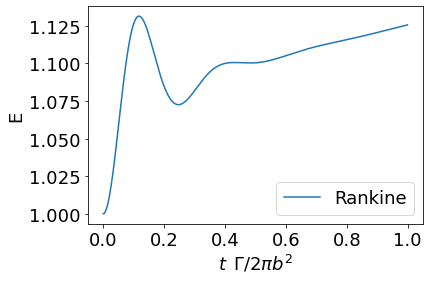

In [26]:
plt.rcParams['font.size'] = '18'   
N = 1000
t = np.arange(0,SV_LO.T,SV_LO.dt)

# ax = CBV_ran.vortex_pair_rad[0,1]
# ay = CBV_ran.vortex_pair_rad[1,1]
# E = ay/ax
# plt.plot(time[:N],E[:N],'--')

ax = CBV_LO.vortex_pair_rad[0,1]
ay = CBV_LO.vortex_pair_rad[1,1]
E = ay/ax
plt.plot(t[:N],E[:N])

plt.xlabel('$t \hspace{0.5}\Gamma/2\pi b^2$')
plt.ylabel('E')
plt.legend(['Rankine','Lamb-Oseen'])


# plt.savefig("ouputs/Aug25/plots/LO_Ran_E_small_time.png", facecolor='none', bbox_inches="tight",
#             pad_inches=0.05, transparent=True, dpi=300)

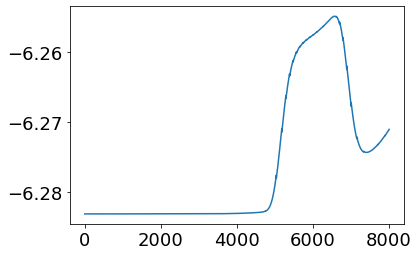

In [120]:
plt.plot(CBV_LO.gamma)

In [33]:
Ut = np.copy(SV.U)
Uf = rfft2(Ut)
Xc,XCind = vortexPairCenterVortCentroid(Uf,SV)
W_d = vorticity2D_fd(Ut,SV)
vort_ran[0] = W_d[:,int(XCind[1,0])]

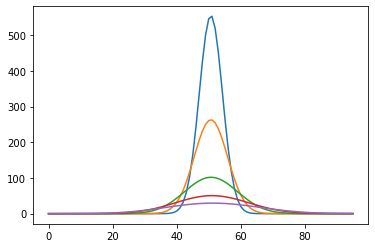

In [36]:
for i in range(5) : plt.plot(vort_LO[i][504:600])
plt.show()

In [102]:
from scipy.io import savemat
folderpath = r"ouputs/Aug25/mat_data/vorticity/"

filepath = folderpath + "vort_ran.mat"
data = {"vort_ran":vort_ran,"rad_a_ran":a_ran}
savemat(filepath,data)

filepath = folderpath + "vort_LO.mat"
data = {"vort_LO":vort_LO,"rad_a_LO":a_LO}
savemat(filepath,data)


## Lamb Oseen a/b = 0.2 study

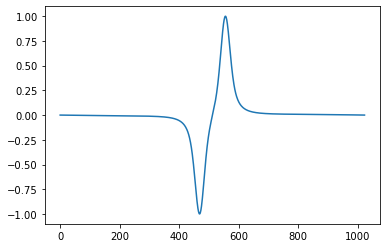

In [203]:
U = np.copy(SV.U)
Uf = rfft2(U)
Xc,XCind = vortexPairCenterVortCentroid(Uf,SV)
W = vorticity2D(Uf,SV)

strain_alt = velGradient(Uf,SV_LO)

folderpath = r"ouputs/Aug25/mat_data/full_data/"

filepath = folderpath + "vort_LO_rc_0.2_analytical.mat"
data = {"vort_alt":W,"U_alt":U,"vort_pos_alt":XCind,"strain_alt":strain_alt}
savemat(filepath,data)

SV.Mesh[0,1,512]
plt.plot(U[0,:,512])



In [248]:
filepath = r"ouputs/Aug25/full_data/data_rc_0.2_Re_3142_LO_L12_1024.pkl"
infile = open(filepath,'rb')
SV_LO  = pickle.load(infile)
CBV_LO  = pickle.load(infile)
infile.close()


In [311]:
Nt = -1
# Ut = SV.Ut[:,:,:,Nt]
U = SV_LO.Ut[:,:,:,-1] 
Uf = rfft2(U)
Xc,XCind = vortexPairCenterVortCentroid(Uf,SV_LO)
W = vorticity2D(Uf,SV_LO)
W[:,int(XCind[1,0])]
strain_sim = velGradient(Uf,SV_LO)

# folderpath = r"ouputs/Aug25/mat_data/full_data/"

# filepath = folderpath + "vort_LO_rc_0.2_sim.mat"
# data = {"vort_sim":W,"U_sim":U,"vort_pos_sim":XCind,"strain_sim":strain_sim}


# savemat(filepath,data)

Xc

array([[5.49810995, 6.5017916 ],
       [6.04432062, 6.04431564]])

In [321]:
# plt.plot(U[0,:,516-1])
%matplotlib widget
N = 1024
# x = np.linspace(0,12,N)
# y = np.ones(x.shape)*6.0443156
y = np.linspace(0,12,N)
x = np.ones(x.shape)*6.5017916
U_int = np.zeros(x.shape)
U_alt_int = np.zeros(x.shape)

for i in range(N):
    U_int[i]     = interpolate(x[i],y[i],U[1],SV_LO)
    U_alt_int[i] = interpolate(x[i],y[i],U_alt[1],SV)
    
    
plt.rcParams['font.size'] = '16'    
plt.plot(SV.Mesh[0,300:700,1],U_int[300+4:700+4])
plt.plot(SV.Mesh[0,300:700,1],U_alt_int[300:700])
plt.xlabel('$y/b$',fontsize=18)
plt.ylabel('$v$ velocity',fontsize=18,**{'fontname':'Helvetica'})
plt.legend(['Simulated','Analytical'])
# plt.hlines(0,0,12)
# plt.show()
plt.savefig("ouputs/Aug25/plots/LO_sim_alt_ay_vvel.png", facecolor='none', bbox_inches="tight",
            pad_inches=0.05, transparent=True, dpi=300)


SV.Mesh[0,469,1]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

5.49609375

In [377]:
# plt.plot(U[0,:,516-1])
%matplotlib widget
N = 1024
# x = np.linspace(0,12,N)
# y = np.ones(x.shape)*6.0443156
# y2 = np.ones(x.shape)*6.0
y = np.linspace(0,12,N)
y2 = y
x = np.ones(x.shape)*6.5017916
x2 = np.ones(x.shape)*6.5002051

U = SV_LO.Ut[:,:,:,-1] 
Uf = rfft2(U)
W_sim = vorticity2D(Uf,SV_LO)

U_alt = np.copy(SV.U)
Uf = rfft2(U_alt)
W_alt = vorticity2D(Uf,SV)

W_int = np.zeros(x.shape)
W_alt_int = np.zeros(x.shape)

for i in range(N):
    W_int[i]     = interpolate(x[i],y[i], W_sim,SV_LO)
    W_alt_int[i] = interpolate(x2[i],y2[i],W_alt,SV)
    
    
plt.rcParams['font.size'] = '16'    
plt.plot(SV.Mesh[1,1,400:624],    W_int[400+4:624+4])
plt.plot(SV.Mesh[1,1,400:624],W_alt_int[400:624])
plt.xlabel('$y/b$',fontsize=18)
plt.ylabel('vorticity',fontsize=18,**{'fontname':'Helvetica'})
plt.legend(['Simulated','Analytical'])
# plt.hlines(0,0,12)
# plt.show()
# plt.savefig("ouputs/Aug25/plots/LO_sim_alt_ay_vort.png", facecolor='none', bbox_inches="tight",
#             pad_inches=0.05, transparent=True, dpi=300)




Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [384]:
# x = np.linspace(0,12,N)
# y = np.ones(x.shape)*6.0443156
# y2 = np.ones(x.shape)*6.0
y = np.linspace(0,12,N)
y2 = y
x = np.ones(x.shape)*6.5017916
x2 = np.ones(x.shape)*6.5002051

U = SV_LO.Ut[:,:,:,-1] 
Uf = rfft2(U)
strain_sim = velGradient(Uf,SV_LO)

U_alt = np.copy(SV.U)
Uf = rfft2(U_alt)
strain_alt = velGradient(Uf,SV)

strain_sim_int = np.zeros((4,N))
strain_alt_int = np.zeros((4,N))

for i in range(N):
    strain_sim_int[0,i]  = interpolate(x[i],y[i], strain_sim[0],SV_LO)
    strain_sim_int[1,i]  = interpolate(x[i],y[i], strain_sim[1],SV_LO)
    strain_sim_int[2,i]  = interpolate(x[i],y[i], strain_sim[2],SV_LO)
    strain_sim_int[3,i]  = interpolate(x[i],y[i], strain_sim[3],SV_LO)
    
    strain_alt_int[0,i]  = interpolate(x2[i],y2[i], strain_alt[0],SV)
    strain_alt_int[1,i]  = interpolate(x2[i],y2[i], strain_alt[1],SV)
    strain_alt_int[2,i]  = interpolate(x2[i],y2[i], strain_alt[2],SV)
    strain_alt_int[3,i]  = interpolate(x2[i],y2[i], strain_alt[3],SV)


plt.rcParams['font.size'] = '12'   
fig = plt.figure()
gs = fig.add_gridspec(2,2)
axs = gs.subplots(sharex = True,sharey=True)
# fig.suptitle('Sharing both axes')
axs[0,0].plot(y[400:624],strain_sim_int[0][400+4:624+4],y2[400:624],strain_alt_int[0][400:624])
axs[0,0].set_ylabel('$du/dx$')
axs[0,1].plot(y[400:624],strain_sim_int[1][400+4:624+4],y2[400:624],strain_alt_int[1][400:624])
axs[0,1].set_ylabel('$du/dy$')
axs[1,0].plot(y[400:624],strain_sim_int[2][400+4:624+4],y2[400:624],strain_alt_int[2][400:624])
axs[1,0].set_ylabel('$dv/dx$')
axs[1,0].set_xlabel('$y/b$')
axs[1,1].plot(y[400:624],strain_sim_int[3][400+4:624+4],y2[400:624],strain_alt_int[3][400:624])
axs[1,1].set_ylabel('$dv/dy$')
axs[1,1].set_xlabel('$y/b$')
plt.legend(['Simulated','Analytical'])

plt.savefig("ouputs/Aug25/plots/LO_sim_alt_ay_strain.png", facecolor='none', bbox_inches="tight",
            pad_inches=0.05, transparent=True, dpi=300)


# Hide x labels and tick labels for all but bottom plot.
# for ax in axs.flat:
#     ax.label_outer()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
%matplotlib widget

L = 5
x = np.linspace(0,L,101)+1e-16 
xc = L/2

v = (x-xc)*(1-exp(-(x-xc)**2/0.04))/((x-xc)**2) # single vortex at the center of the domain
  + (x-xc-L)*(1-exp(-(x-xc-L)**2/0.04))/((x-xc-L)**2) +(x-xc+L)*(1-exp(-(x-xc+L)**2/0.04))/((x-xc+L)**2)\  # vortices at L = -2.5 and L = 7.5
  + (x-xc-2*L)*(1-exp(-(x-xc-2*L)**2/0.04))/((x-xc-2*L)**2)+(x-xc+2*L)*(1-exp(-(x-xc+2*L)**2/0.04))/((x-xc+2*L)**2) # vortices at L = -7.5 and L = 12.5

plt.rcParams['font.size'] = '12'   
plt.plot(x,v)
plt.hlines(0,0,5,'r',linestyle='--')
plt.xlabel("x")
plt.ylabel("tangential velocity")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [88]:
%matplotlib widget
from mpl_toolkits import mplot3d
xL,xR = 0,6
x = np.linspace(xL,xR,100)
y = x.copy()

X,Y = np.meshgrid(x,y,indexing='ij')

a = 1.05
n = 27
wx = 10**(-a**n*np.abs(2*(X-xL)/(xR-xL)-1)**n)
wy = 10**(-a**n*np.abs(2*(Y-xL)/(xR-xL)-1)**n)
w = wx*wy

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(X,Y,w)
# plt.plot(x,wy[1,:])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …